In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import random 

In [3]:
# Defining some key methods
def label_to_output(label):
    o = [0]*10
    o[label] = 1
    return o

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def d_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

def get_loss(m, y, label):
    return (0.5 * (1/m) * np.sum((y-label)**2))

def forward(x):
    input_layer = x.reshape(-1, 784, 1)
    z1 = np.matmul(output_w, input_layer) + output_b
    y  = sigmoid(z1)
    return y

def validate(x, labels, label_arrays):
    m = x.shape[0]

    y = forward(x)
    loss = get_loss(m, y, label_arrays.reshape(-1, 10, 1))

    predictions = np.argmax(y, axis = 1)
    equals = predictions == labels.reshape(m, 1)
    accuracy = np.average(equals)

    return accuracy, loss


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train/255, x_test/255

TRAIN_LENGTH = len(x_train) # 60000
TEST_LENGTH = len(x_test) # 10000

train_labels = np.zeros((TRAIN_LENGTH, 10))
for i, label in enumerate(y_train):
    train_labels[i] = (label_to_output(label))

test_labels = np.zeros((TEST_LENGTH, 10))
for i, label in enumerate(y_test):
    test_labels[i] = (label_to_output(label))


In [5]:
lr = 0.1
batch_size = 1
epochs = 10

output_w = 2 * np.random.rand(10, 784) - 1
output_b = 2 * np.random.rand(10,  1 ) - 1

running_loss = 0
running_accuracy = 0

history = {'losses':[], 
           'cv_losses':[], 
           'accuracies':[],
           'cv_accuracies':[]}

for e in range(epochs):
    for i, x in enumerate(x_train):
    # for i in range(1):
        label = train_labels[i].reshape(-1, 10, 1)
        l = y_train[i]
        x = x_train[i]
        m = batch_size

        # Forward Pass
        input_layer = x.reshape(-1, 784, 1)
        
        z1 = np.matmul(output_w, input_layer) + output_b
        y  = sigmoid(z1)
        
        # Error
        output_error = (y - label) * d_sigmoid(z1)
        running_loss += get_loss(m, y, label)

        predictions = np.argmax(y, axis = 1)
        equals = predictions == l.reshape(m, 1)
        running_accuracy += np.average(equals)

        # Gradient Descent
        output_w_grad = np.sum(np.matmul(output_error, np.einsum('ijk->ikj', input_layer)), axis = 0)
        output_b_grad = np.sum(output_error, axis = 0)

        output_w = output_w - (lr / m) * output_w_grad
        output_b = output_b - (lr / m) * output_b_grad
        
        # Cross validation
        datapoints = 1 # times
        every = 60000 / (batch_size * datapoints)
        if (i+1) % every == 0:
            
            loss = running_loss / every
            accuracy = running_accuracy / every
            # accuracy, loss = validate(x_train, y_train, train_labels)
        
            test_accuracy, test_loss = validate(x_test, y_test, test_labels)
        
            print('Epoch {}, accuracy = {:.2%} loss = {:.3f}, CV accuracy = {:.2%}, loss = {:.3f}'.format(
                    e+1, 
                    accuracy,
                    loss, 
                    test_accuracy, 
                    test_loss))
            
            history['losses'].append(loss)
            history['cv_losses'].append(test_loss)
            history['accuracies'].append(accuracy)
            history['cv_accuracies'].append(test_accuracy)

            running_loss = 0
            running_accuracy = 0

Epoch 1, accuracy = 72.66% loss = 0.199, CV accuracy = 88.98%, loss = 0.105
Epoch 2, accuracy = 89.99% loss = 0.096, CV accuracy = 90.46%, loss = 0.092
Epoch 3, accuracy = 90.84% loss = 0.088, CV accuracy = 91.00%, loss = 0.087
Epoch 4, accuracy = 91.23% loss = 0.084, CV accuracy = 91.32%, loss = 0.085
Epoch 5, accuracy = 91.42% loss = 0.082, CV accuracy = 91.38%, loss = 0.084
Epoch 6, accuracy = 91.56% loss = 0.080, CV accuracy = 91.51%, loss = 0.083
Epoch 7, accuracy = 91.66% loss = 0.079, CV accuracy = 91.57%, loss = 0.082
Epoch 8, accuracy = 91.75% loss = 0.078, CV accuracy = 91.69%, loss = 0.081
Epoch 9, accuracy = 91.83% loss = 0.077, CV accuracy = 91.69%, loss = 0.081
Epoch 10, accuracy = 91.87% loss = 0.077, CV accuracy = 91.73%, loss = 0.081


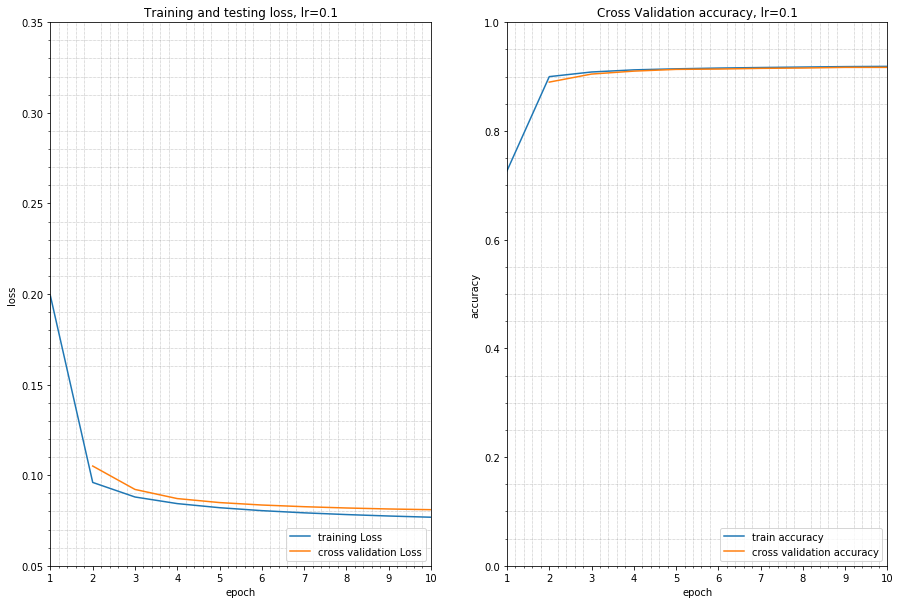

In [6]:
image = 9

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 10)

x = np.arange(10) + 1

axs[0].plot(x, history['losses'], label = 'training Loss')
axs[0].plot(x[1:], history['cv_losses'][:9], label = 'cross validation Loss')
axs[0].set_ylabel('loss')
axs[0].set(xlim=[1, 10])
axs[0].set(ylim=[0.05, 0.35])
axs[0].set_title('Training and testing loss, lr={}'.format(lr))

axs[1].plot(x, history['accuracies'], label = 'train accuracy')
axs[1].plot(x[1:], history['cv_accuracies'][:9], label = 'cross validation accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_title('Cross Validation accuracy, lr={}'.format(lr))
axs[1].set(xlim=[1, 10])
axs[1].set(ylim=[0, 1])

for ax in axs:
    ax.legend(loc = 'lower right', markerscale=20)
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.set_xlabel('epoch')

filename = 'images/single_layer_loss{}.png'.format(image)

plt.savefig(filename, dpi = 300)


In [7]:
# np.save('single_layer_weight', output_w)
# np.save('single_layer_bias', output_b)

In [53]:
'''

Input(784, 1) -> Output Layer (10, 1)

Input: m x 784 x 1

output layer: 10 neurons
* output_w = 10 x 784
* output_b = 10 x 1


Forward pass:

x -> input                          m x 784 x 1

z1 = output_w * Input + output_b    m x 10 x 1
y  = sigmoid(z1)                    m x 10 x 1


Error:
output_error = (y - label) .* d_sigmoid(z1)    m x 10 x 1

Gradient Descent:
                      m x 10 x 1      m x (784 x 1)^T
output_w_grad = sum( output_error *       Input)
output_b_grad = sum( output_error )

output_w = output_w - lr/m * (output_w_grad)
output_b = output_b - lr/m * (output_b_grad)

'''

'\n\nInput(784, 1) -> Output Layer (10, 1)\n\nInput: m x 784 x 1\n\noutput layer: 10 neurons\n* output_w = 10 x 784\n* output_b = 10 x 1\n\n\nForward pass:\n\nx -> input                          m x 784 x 1\n\nz1 = output_w * Input + output_b    m x 10 x 1\ny  = sigmoid(z1)                    m x 10 x 1\n\n\nError:\noutput_error = (y - label) .* d_sigmoid(z1)    m x 10 x 1\n\nGradient Descent:\n                      m x 10 x 1      m x (784 x 1)^T\noutput_w_grad = sum( output_error *       Input)\noutput_b_grad = sum( output_error )\n\noutput_w = output_w - lr/m * (output_w_grad)\noutput_b = output_b - lr/m * (output_b_grad)\n\n'